In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

ModuleNotFoundError: No module named 'lightgbm'

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [3]:
df # Taking a look at the dataset's first and last 5 rows showcasing all the column names as well

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# # Exploratory Data Analysis (EDA)


In [5]:
df.shape


(1599, 12)

In [6]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.skew() # acceptable range is +/-0.5


fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# # Visualization


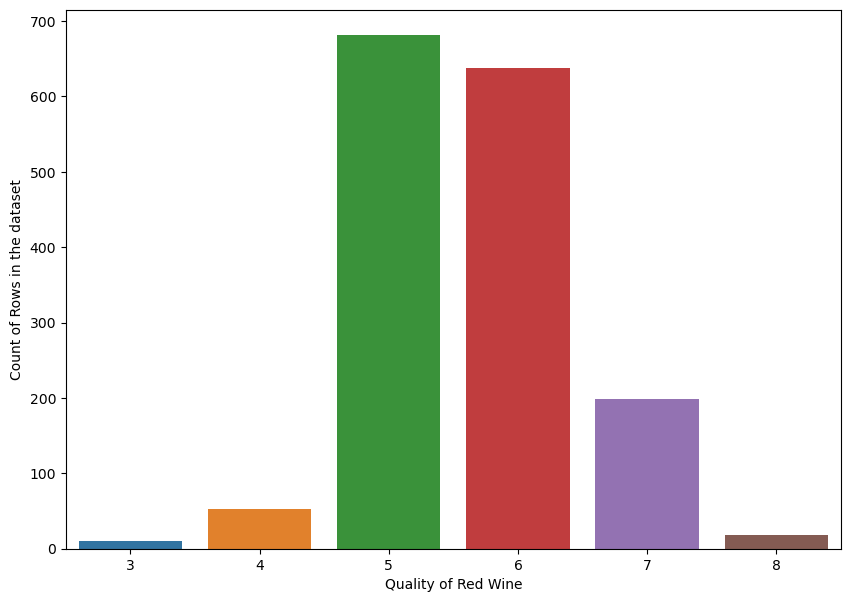

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

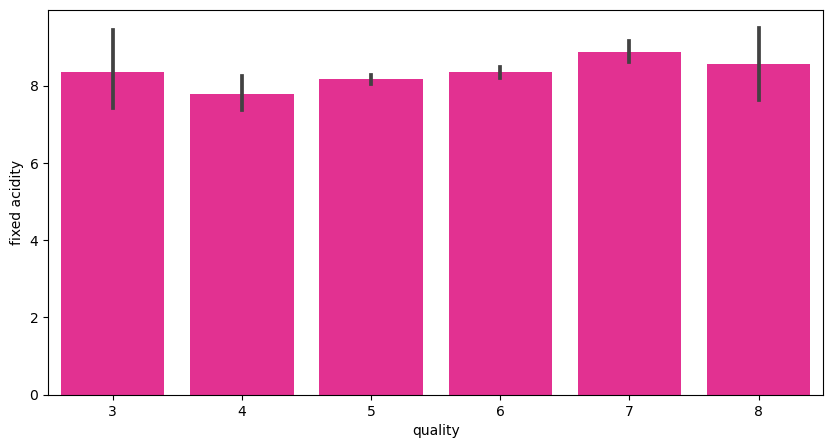

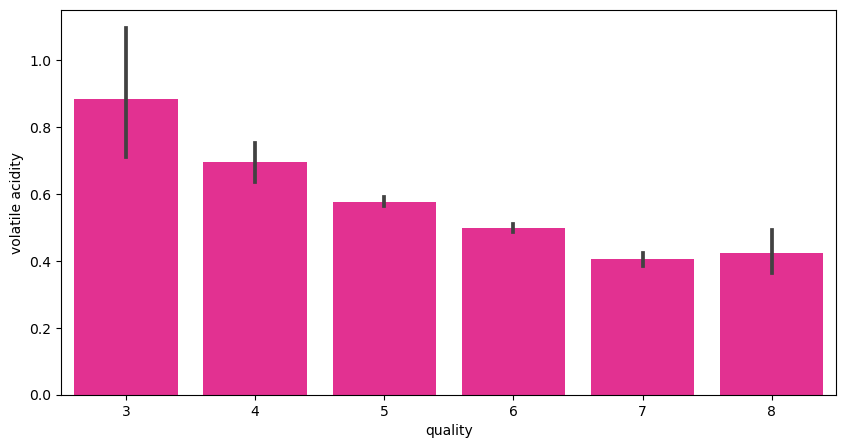

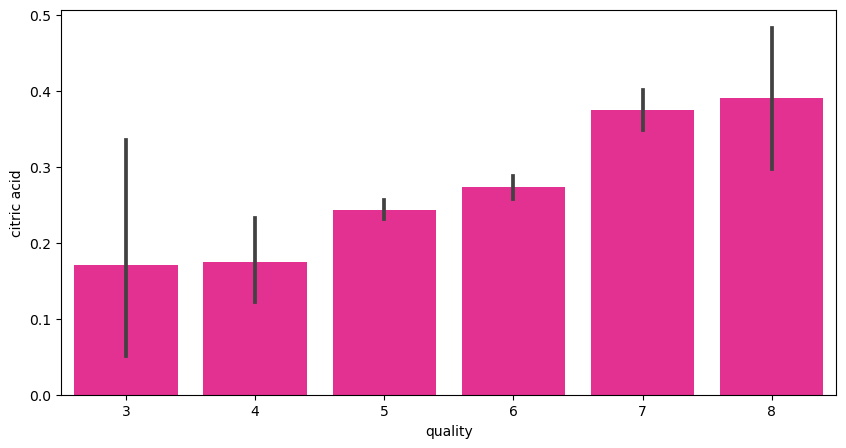

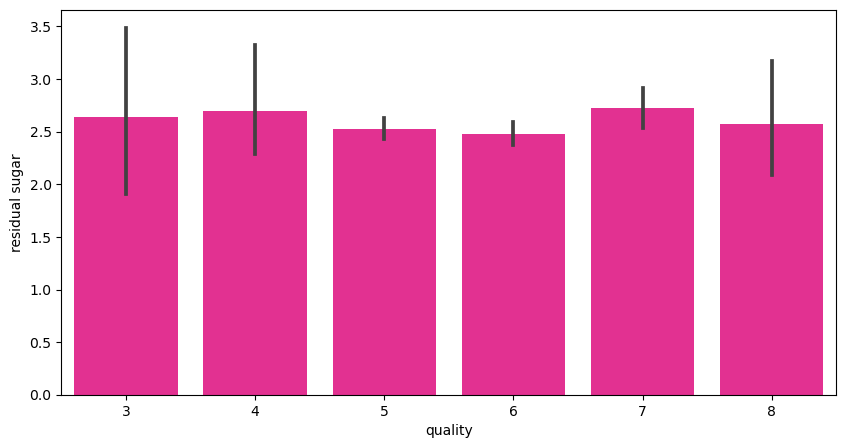

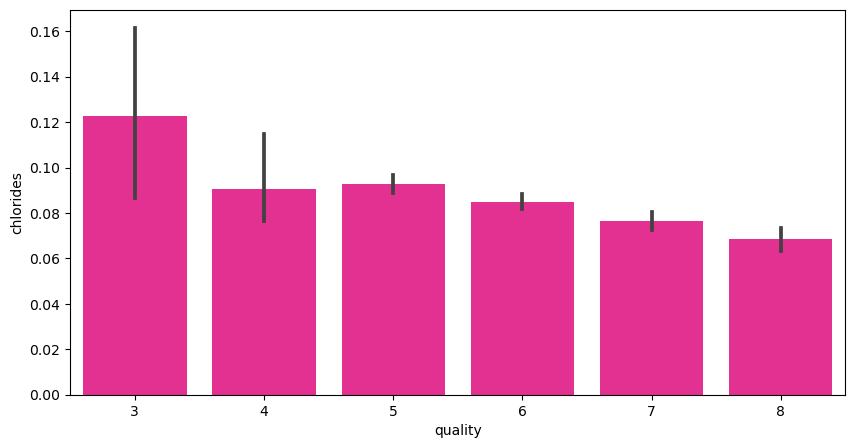

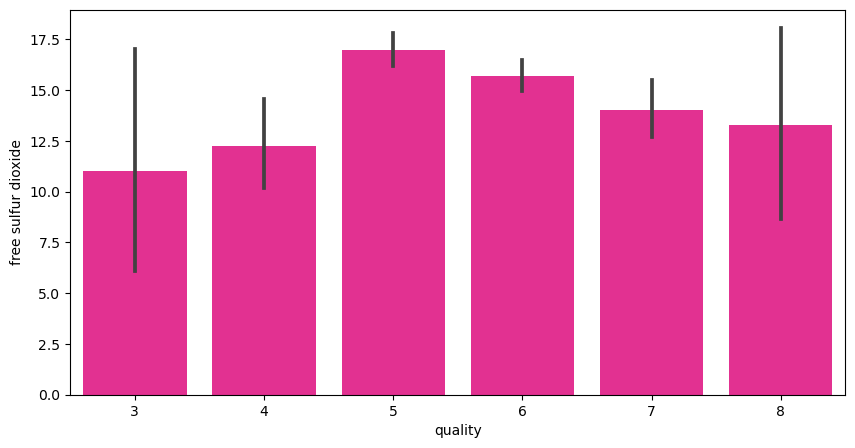

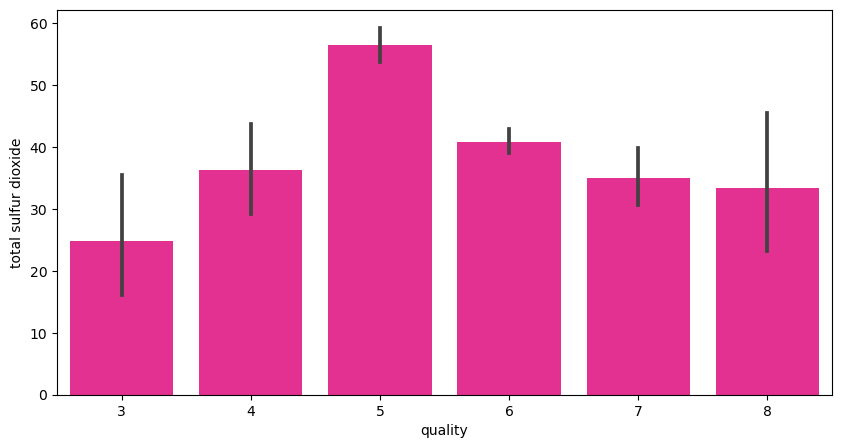

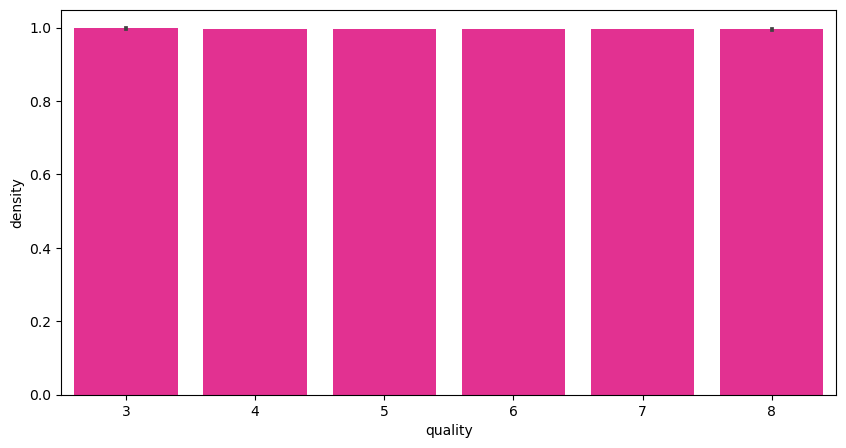

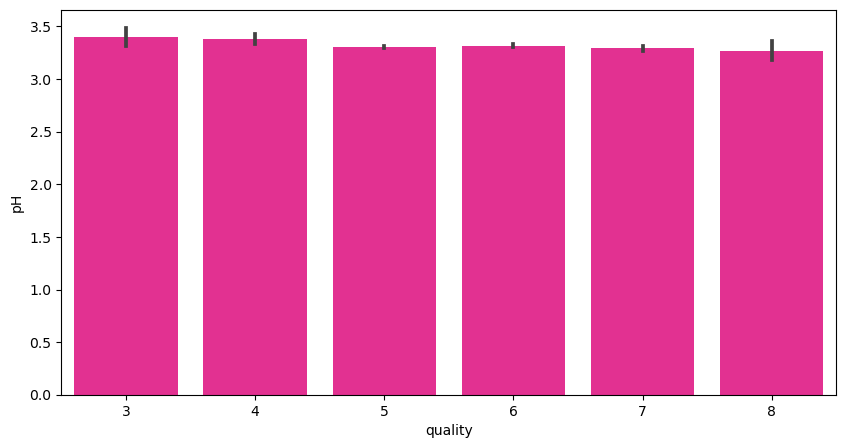

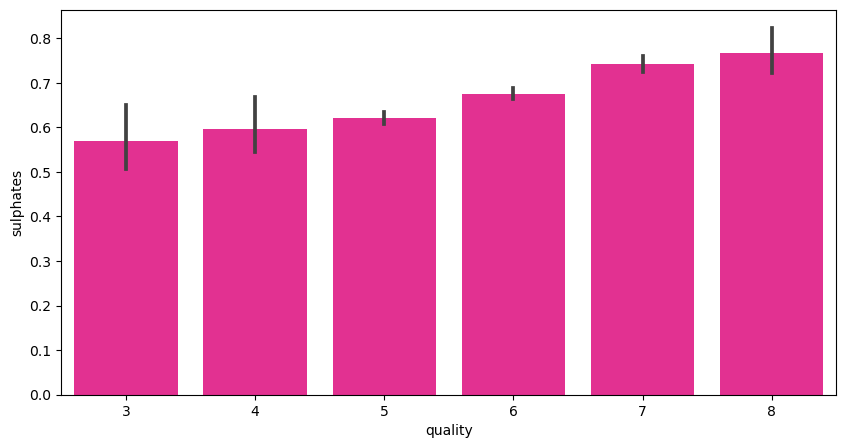

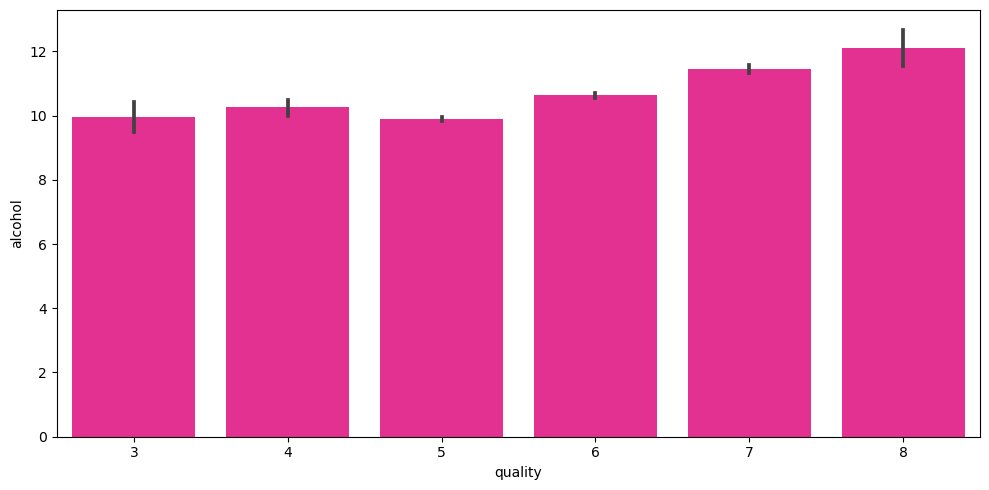

In [11]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="deeppink")
plt.tight_layout()
plt.show()

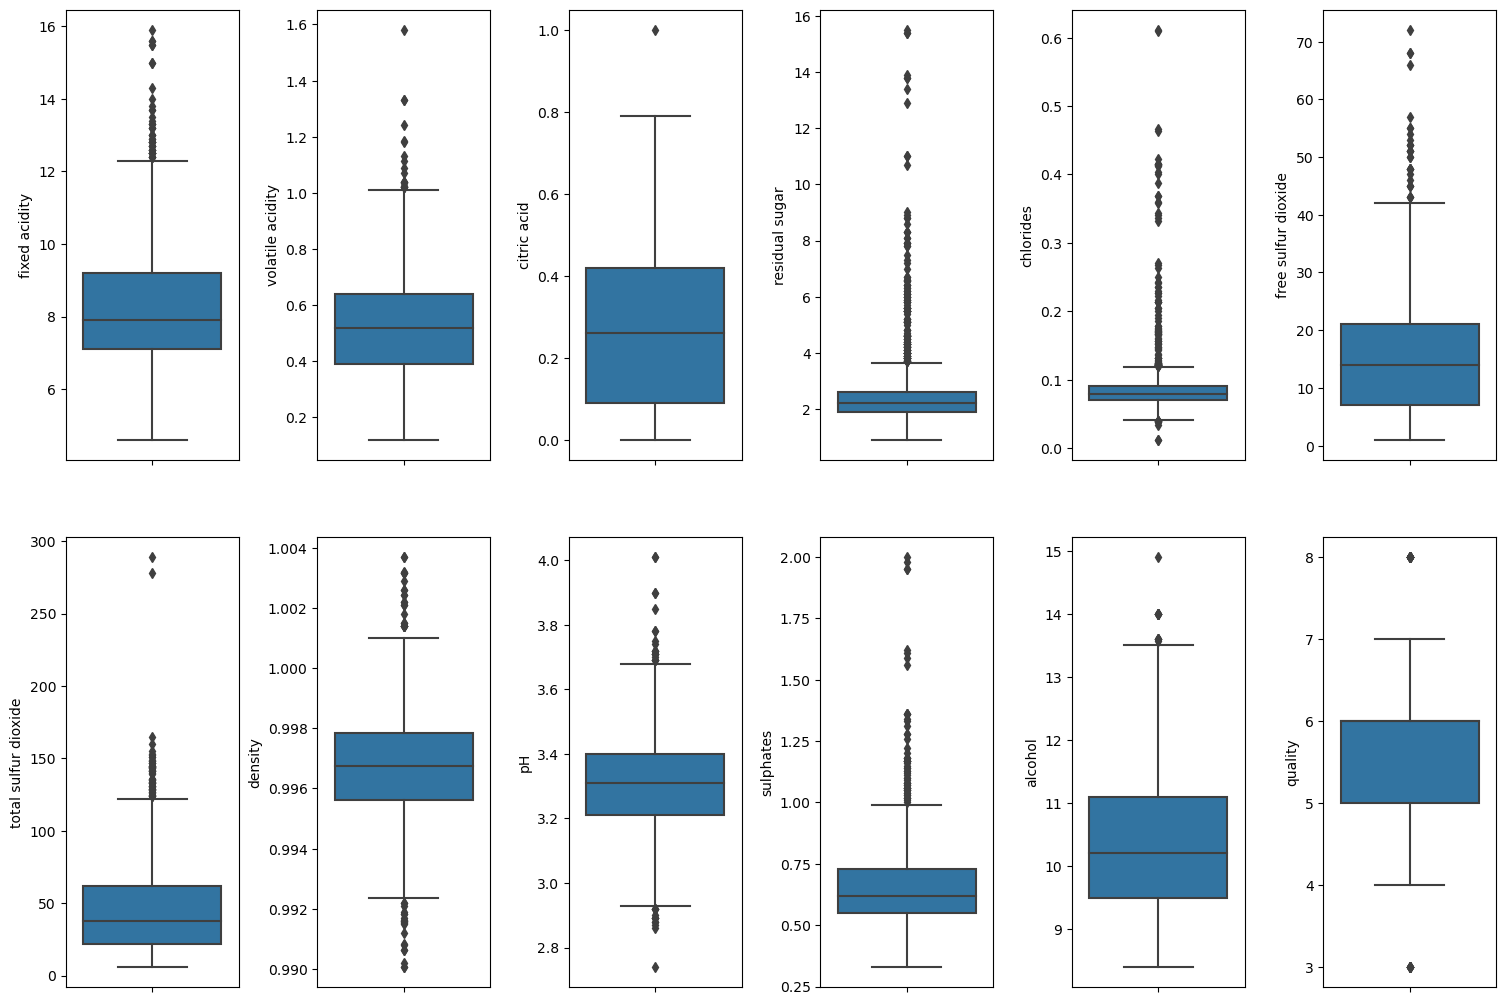

In [12]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

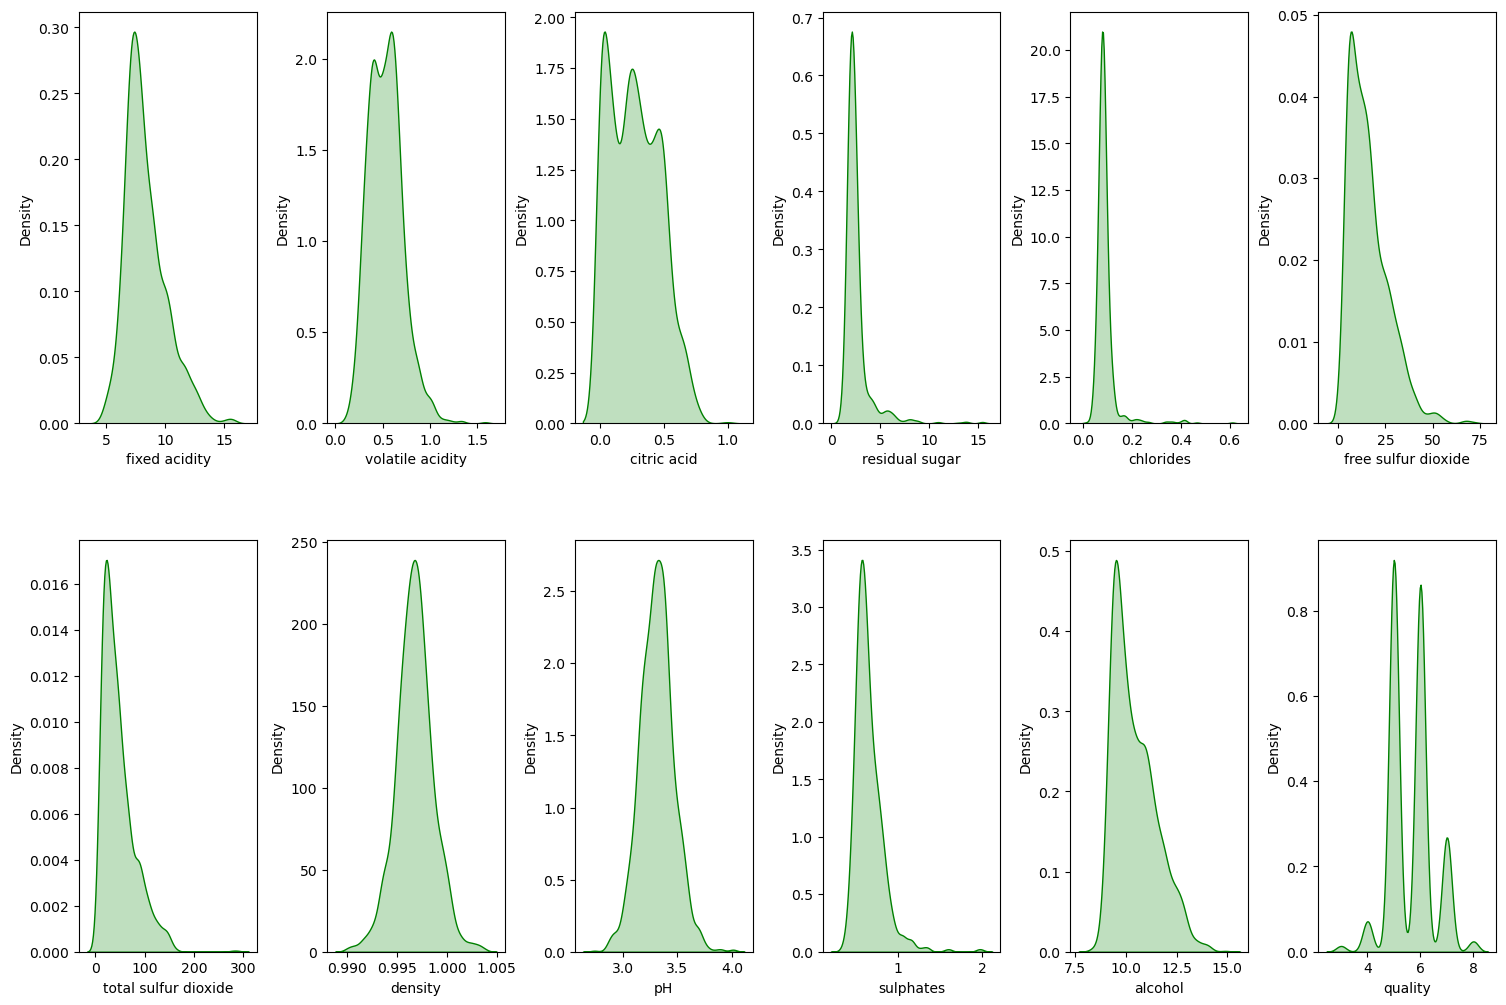

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

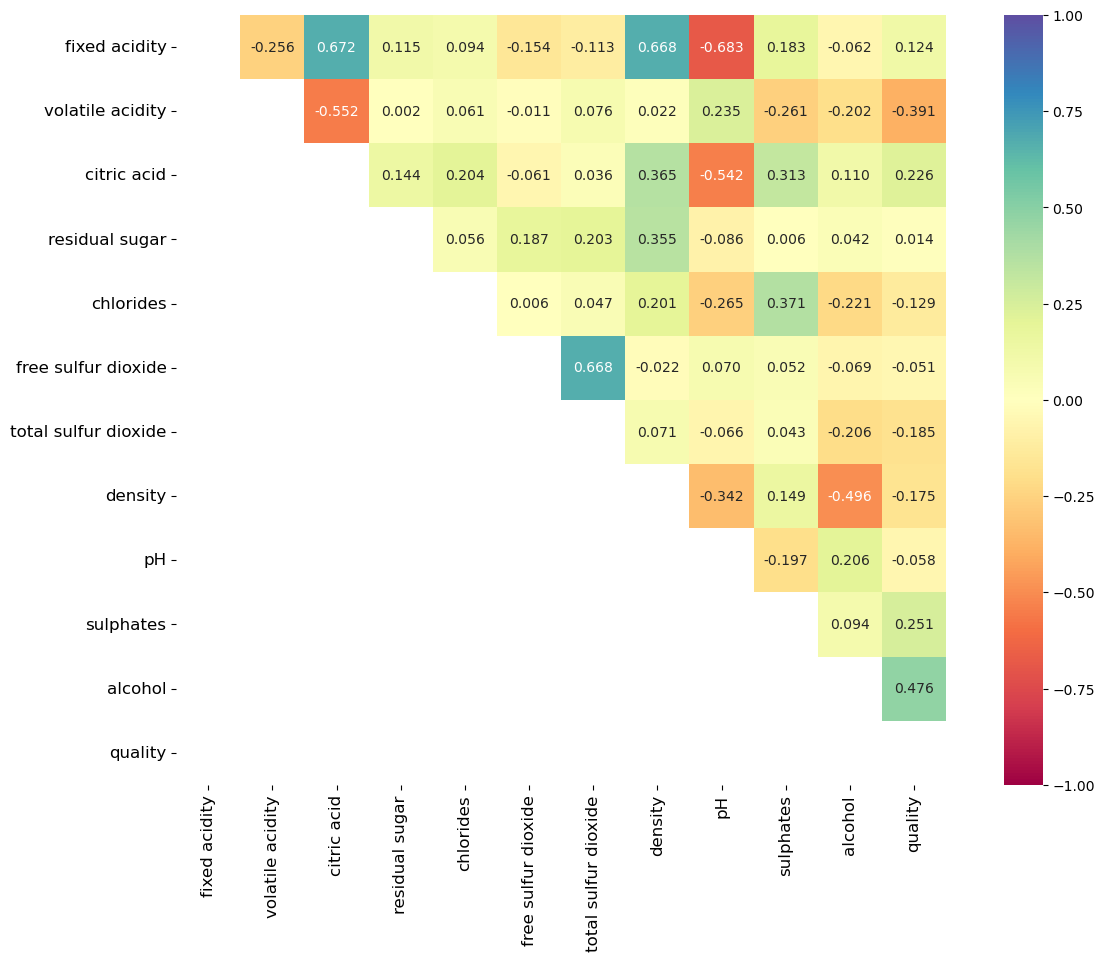

In [14]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
df.shape

(1599, 11)

In [17]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df.shape


(1464, 11)

In [19]:
# Percentage of Data Loss

data_loss=(1600-1464)/1600*100 
# 1600 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.5

In [20]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [21]:
Y.value_counts()


5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

In [22]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [23]:
Y.value_counts()


5    624
6    624
7    624
4    624
8    624
Name: quality, dtype: int64

In [24]:
Y # Displaying just the label


0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

In [25]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [26]:
X # Displaying all the features except the label


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,7.867983,0.420438,0.341535,3.183773,0.073838,39.561398,0.996298,3.385219,0.821579,12.767983
3116,10.439507,0.475075,0.620182,4.113062,0.083283,18.094218,0.997713,3.188298,0.794165,12.630085
3117,9.400119,0.300020,0.560007,2.800150,0.080000,17.000125,0.996400,3.150004,0.919986,11.700106
3118,11.113051,0.535873,0.626379,4.389889,0.081015,18.065256,0.998301,3.198189,0.677537,12.652205


In [27]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.653366,1.053917,-1.516397,-0.657081,-0.152155,-0.115959,0.813471,1.490396,-0.794692,-1.253661
1,-0.403483,2.073673,-1.516397,0.131942,1.073208,1.136744,0.208075,-0.770033,0.102760,-0.893729
2,-0.403483,1.393836,-1.310879,-0.206211,0.739018,0.643255,0.329154,-0.332531,-0.121603,-0.893729
3,1.720522,-1.325512,1.360855,-0.657081,-0.207853,0.871019,0.934551,-1.061701,-0.645117,-0.893729
4,-0.653366,1.053917,-1.516397,-0.657081,-0.152155,-0.115959,0.813471,1.490396,-0.794692,-1.253661
...,...,...,...,...,...,...,...,...,...,...
3115,-0.361014,-0.529885,0.238395,0.789957,-0.272589,0.095155,-0.095923,0.580531,1.161597,1.776948
3116,1.245437,-0.220353,1.670067,1.837430,0.253477,-0.719754,0.760839,-0.855363,0.956573,1.652864
3117,0.596123,-1.212093,1.360891,0.357546,0.070659,-0.761286,-0.033993,-1.134587,1.897558,0.816042
3118,1.666205,0.124088,1.701906,2.149463,0.127156,-0.720853,1.117059,-0.783236,0.084338,1.672768


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=21)


#  Machine Learning Model for Classification and Evaluation Metrics


In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb


def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    model.fit(X_train, Y_train)
    
    pred = model.predict(X_test)
    
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, Y)

Accuracy Score: 89.58333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       391
           1       0.86      0.87      0.86       233

    accuracy                           0.90       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624

Cross Validation Score: 87.56410256410255

Accuracy Score - Cross Validation Score is 2.019230769230788


In [31]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 91.98717948717949

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       391
           1       0.89      0.90      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 89.4551282051282

Accuracy Score - Cross Validation Score is 2.5320512820512846


In [32]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.3076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       391
           1       0.88      0.91      0.90       233

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 88.97435897435898

Accuracy Score - Cross Validation Score is 3.3333333333333286


In [33]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.03205128205127

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.92      0.95      0.93       233

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.95       624
weighted avg       0.95      0.95      0.95       624

Cross Validation Score: 92.1153846153846

Accuracy Score - Cross Validation Score is 2.9166666666666714


In [34]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 90.38461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       391
           1       0.84      0.91      0.88       233

    accuracy                           0.90       624
   macro avg       0.89      0.91      0.90       624
weighted avg       0.91      0.90      0.90       624

Cross Validation Score: 88.30128205128206

Accuracy Score - Cross Validation Score is 2.0833333333333286


In [35]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 95.51282051282051

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.93      0.96      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.65384615384616

Accuracy Score - Cross Validation Score is 1.8589743589743506


In [36]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 95.51282051282051

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       391
           1       0.93      0.96      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.96      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 91.76282051282051

Accuracy Score - Cross Validation Score is 3.75


In [58]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
classify(model, X, Y)

SyntaxError: invalid syntax (979888220.py, line 1)

# Hyper parameter tuning on the best ML Model


In [59]:
svc_param = {'kernel': ['poly', 'sigmoid', 'rbf'],
             'gamma': ['scale', 'auto'],
             'shrinking': [True, False],
             'random_state': [21, 42, 104],
             'probability': [True, False],
             'decision_function_shape': ['ovo', 'ovr'],
             'verbose': [True, False]}

In [60]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)


NameError: name 'GridSearchCV' is not defined

In [63]:
GSCV.fit(X_train,Y_train)


NameError: name 'GSCV' is not defined

In [62]:
GSCV.best_params_


NameError: name 'GSCV' is not defined

In [47]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 91.98717948717949


# AUC ROC Curve


In [53]:
from sklearn import metrics

disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

# Confusion Matrix


In [65]:

class_names = df.columns
plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

# Saving the model


In [55]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']